In [ ]:
import numpy as np

In [2]:
import bt
data = bt.get('QQQ, SCHD, BRK-B, SHV',
              start = '2013-01-01', end = '2023-12-31')

QQQ = bt.get('QQQ',
              start = '2013-01-01', end = '2023-12-31')
SPY = bt.get('SPY',
              start = '2013-01-01', end = '2023-12-31')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import yfinance as yf # 주가 데이터 받기위한 라이브러리
import quantstats as qs # 리포트 형식으로 시각화해주는 라이브러리
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2023-12-01')
nn = 5
# yahoo finance에서 필요 종목들의 공통 시작일부터 종가 데이터 받기
def get_yahoo_data(tickers, type="Adj Close"):
  df = yf.download(tickers)
  # df = df["Close"]
  df = df[type]
  df.dropna(inplace=True)
  return df
  
def get_rebal_date(df, rebal="month", day=0):
    res_df = pd.DataFrame()
    df = df.loc[(start<=df.index) & (df.index<=end)]
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["day"] = df.index.day
    if rebal == 'month':
        days_df = df.groupby(["year","month"]).first()
    elif rebal == 'year':
        days_df = df.groupby(["year"]).first()
    else:
        days_df = df.groupby(["year","month","day"]).first()
        # days_df = days_df.iloc[range(0, len(days_df), day)]
    # else:
    #     days_df = df.groupby(["year","month","day"]).max()
    print(days_df)
    return days_df
    # for i in range(len(days_df)):
    #     day = "{}-{}-{}".format(days_df.index[i][0], days_df.index[i][1], days_df.iloc[i])
    #     res_df = pd.concat([res_df,df[df.index==day]])
    # return res_df

tickers_canary = ["QQQ","BRK-B","SCHD", "SPY", "XLV", "TLT", "QLD", "EFA", "BIL", "SHV", "EEM", "AGG"]
tickers_g4 = ["QQQ","BRK-B","SCHD", "TLT"]
tickers_g12 = ["SPY", "QQQ", "IWM","VGK","EWJ", "EEM", "VNQ","DBC","GLD", "TLT", "HYG", "LQD"]
tickers_safe = ["SHV", "TLT"]
tickers_all = list(set(tickers_canary+tickers_g4+tickers_g12+tickers_safe))

data = get_yahoo_data(tickers_all) # 모든 데이터
rebal_data = get_rebal_date(data, 'day', day=5) # 월말 데이터
rebal_data.head(3)

In [80]:
scores = []
flag = 'buy'

<>:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\JBU\AppData\Local\Temp\ipykernel_10988\302138709.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if flag is 'buy' and scoreQQQ < scoreXLV <  0:
C:\Users\JBU\AppData\Local\Temp\ipykernel_10988\302138709.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
C:\Users\JBU\AppData\Local\Temp\ipykernel_10988\302138709.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the rel

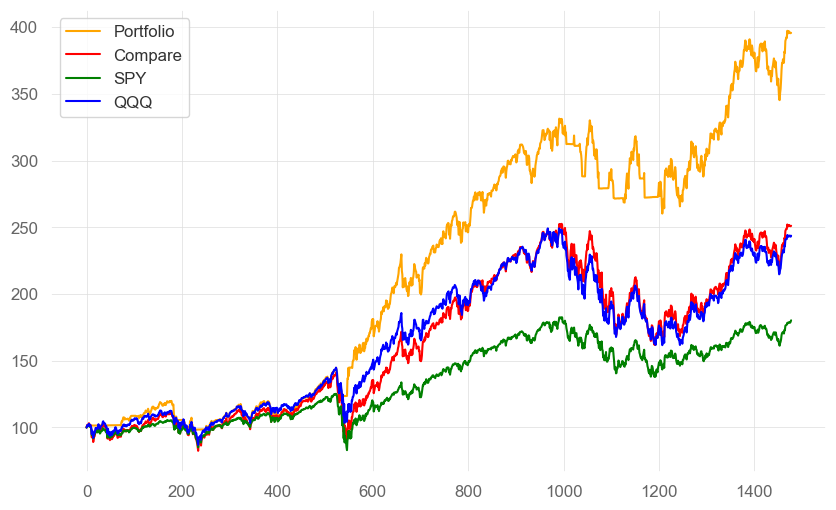

In [86]:
# 공격형
import matplotlib.pyplot as plt
attk_ticker = []
momentum_ticker = []
attk_ratio = []

scores = []
baa_g4 = pd.DataFrame(columns=tickers_all)
baa = pd.DataFrame(columns=tickers_all)
QQQ = pd.DataFrame(columns=tickers_all)
SPY = pd.DataFrame(columns=tickers_all)
compare = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data
profit = rebal_data.pct_change()
n=12
dates = []
flips = 0
flag = True #False = 하락장
patience = 0
for i in range(n, rebal_data.shape[0]):
    # print(canary_data.index[i], profit.index[i])
    m1 = (canary_data.iloc[i]-canary_data.iloc[(i-1*20)])/canary_data.iloc[(i-1*20)]
    m2 = (canary_data.iloc[i]-canary_data.iloc[(i-2*20)])/canary_data.iloc[(i-2*20)]
    m3 = (canary_data.iloc[i]-canary_data.iloc[i-3*20])/canary_data.iloc[i-3*20]
    m4 = (canary_data.iloc[i]-canary_data.iloc[i-4*20])/canary_data.iloc[i-4*20]
    m6 = (canary_data.iloc[i]-canary_data.iloc[i-6*20])/canary_data.iloc[i-6*20]
    m12 = (canary_data.iloc[i]-canary_data.iloc[i-12*20])/canary_data.iloc[i-12*20]
    score = m1 * 10
    score2 = m2 * 6
    score3 = m3 * 4
    score4 = m4 * 3
    score6 = m6 * 2
    score12 = m12 * 1
    
    scoreQQQ = score['QQQ'] + score3['QQQ'] + score6['QQQ'] + score12['QQQ']
    scoreSPY = score['SPY'] + score3['SPY'] + score6['SPY'] + score12['SPY']
    scoreXLV = score['XLV'] + score3['XLV'] + score6['XLV'] + score12['XLV']
    scoreTLT = score['TLT'] + score3['TLT'] + score6['TLT'] + score12['TLT']
    scoreEFA = score['EFA'] + score3['EFA'] + score6['EFA'] + score12['EFA']
    scoreEEM = score['EEM'] + score3['EEM'] + score6['EEM'] + score12['EEM']
    scoreSHV = score['SHV'] + score3['SHV'] + score6['SHV'] + score12['SHV']
    buy = dict()
    scores.append(scoreQQQ)
    if flag is 'buy' and scoreQQQ < scoreXLV <  0:
        buy['SHV'] = 100
    #     flag = 'sold'
    # elif flag is 'sold' and scoreQQQ < -0.5:
    #     buy['QQQ'] = 30
    #     buy['QLD'] = 30
    #     buy['BRK-B'] = 30
    #     buy['XLV'] = 10
    else:
        buy['QQQ'] = 30
        buy['QLD'] = 30
        buy['BRK-B'] = 30
        buy['XLV'] = 10
        flag = 'buy'
    
 
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

baa["Total"] = res

baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['QQQ'] = 30
    buy['QLD'] = 30
    buy['BRK-B'] = 30
    buy['SCHD'] = 10
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

compare["Total"] = res

baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['SPY'] = 100
    
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

SPY["Total"] = res


baa_g4 = pd.DataFrame(columns=tickers_all)
res = [] # 총 자산 시작은 100

canary_data = rebal_data[tickers_canary]
profit = rebal_data.pct_change()
n=12
for i in range(n, rebal_data.shape[0]):
    buy = dict()
    buy['QQQ'] = 100
    
    if i == n:
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]])
        baa_g4 = pd.concat([baa_g4, one])
        res.append(100)
    else:
        total = sum(((1+profit.iloc[i])*baa_g4.iloc[-1]).fillna(0))
        res.append(total)
        one = pd.DataFrame([list(buy.values())], columns=list(buy.keys()), index = [rebal_data.index[i]]) * total / 100
        baa_g4 = pd.concat([baa_g4, one])

QQQ["Total"] = res

plt.plot(baa["Total"], color='orange', label='Portfolio')
plt.plot(compare["Total"], color='red', label='Compare')
plt.plot(SPY["Total"], color='green', label='SPY')
plt.plot(QQQ["Total"], color='blue', label='QQQ')
plt.legend()
# qs.reports.html(baa["Total"], QQQ["Total"], SPY["Total"])

In [84]:
sorted(scores)

[-9.608759675031536,
 -9.588113347342833,
 -9.570369420881836,
 -9.559411765673685,
 -9.5568522213977,
 -9.509707149009825,
 -9.498693441284455,
 -9.44223583404396,
 -4.714628048336731,
 -4.6557105609308636,
 -4.652489086196846,
 -4.620995109481238,
 -4.490113413933559,
 -4.336935717455467,
 -4.33032293610132,
 -4.276237870904032,
 -4.229387209168834,
 -4.185619952451282,
 -4.115977808898251,
 -4.110031228297061,
 -4.085939743028564,
 -4.059943805315484,
 -4.005707329597065,
 -4.000802798534592,
 -3.9817011149530472,
 -3.970658407188441,
 -3.962264207001748,
 -3.919795226881981,
 -3.8907356594683953,
 -3.859295573451303,
 -3.8297992766549798,
 -3.797903261846699,
 -3.776290352870544,
 -3.7711595086238945,
 -3.7466692933319754,
 -3.7446629696118428,
 -3.6471630209313677,
 -3.6341237918210685,
 -3.606020549653555,
 -3.5389713618817957,
 -3.38811351523647,
 -3.360888163815993,
 -3.3144576480967323,
 -3.3137014410441457,
 -3.2784257091997544,
 -3.22041625998336,
 -3.1954485826958714,
 -3.1

In [1167]:
print(flips)

0


In [1104]:
min(scores)

ValueError: min() arg is an empty sequence

In [ ]:
scores

In [ ]:
attack = ['QQQ', 'VWO', 'VEA', 'BND']
defense = ['TIP', 'DBC', 'BIL', 'IEF', 'TLT', 'LQD', 'BND']
canary = ['SPY', 'VWO', 'VEA', 'BND']

In [ ]:
def find_mom_by(detail:str, day:str, asset:list):
    
    def cal_momentum(day, ticker):
    
        day_datetime = datetime.strptime(day, '%Y-%m-%d')
        day_before = day_datetime - timedelta(days=400)
        
        ohlc = yf.download(ticker, start=datetime.strftime(day_before, '%Y- %m-%d') , end=datetime.strftime(day_datetime, '%Y-%m-%d' ), progress=False)
    
    def adj_price(day_before):
    
        param = day_before >= 1
        
        a = ohlc['Adj Close' ][-day_before] # 최근전 종가
        return a

    moment = 12*(adj_price(1)/adj_price(20)-1)+4*(adj_price(1)/adj_price(60)-1)+2*(adj_price(1)/adj_price(120)-1)+(adj_price(1)/adj_price(250)-1)
    return round(moment, 2)



In [125]:
def BAA(day:str, cash:float)->list:
    day = datetime.strftime(datetime.strptime(day, '%Y-%m-%d') + timedelta(days=1), '%Y-%m-%d' )
    def BAA_logic(day:str)->str:
        canary = ['SPY', 'VWO', 'VEA', 'BND']
        try:
            if (find_mom_by('abs', day, canary) >0). value_counts()[False] > 0:
                BAA = 'DEF'
            else:
                pass

        except:
            BAA = 'ATT'

        return BAA

    attack = ['QQQ', 'VWO', 'VEA', 'BND']
    defense = ['TIP', 'DBC', 'BIL', 'IEF', 'TLT', 'LQD', 'BND']
    
    stock_C = {} # 매수종목 초기화
    remain_cash = cash
    if BAA_logic(day) == 'DEF':
        BIL = find_mom_by('rel', day, ['BIL']) [0]
        ticker_buy = find_mom_by('rel', day, defense)
        df = ticker_buy.to_frame()
        
        df = df[df['Value'] > BIL]
        amount_buy = len(df.index)
        
        if amount_buy > 3:
            for i in range(0, 3):
                price_i = yf.download(df.index[i], start=day, end=day, progress=False)['Adj Close'][0]
                num_i = int(0.33 * cash / price_i)
                
                stock_C[df.index[i]] = num_i
                remain_cash = remain_cash - num_i * price_i * (1+0.0025)
        else:
            for i in range(0, amount_buy):
                price_i = yf.download(df.index[i], start=day, end=day, progress=False)['Adj Close'][0]
                num_i = int(0.33 * cash / price_i)
                
                stock_C[df.index[i]] = num_i
                remain_cash = remain_cash - num_i * price_i * (1+0.0025)

    elif BAA_logic(day) == 'ATT':
        stock = find_mom_by('rel', day, attack).index[0]
        price_i = yf.download(stock, start=day, end=day, progress=False)['Adj Close'][0]
        num_i = int(cash / price_i)
        remain_cash = remain_cash - num_i * price_i * (1+0.0025)
    else:
        print('error')
    return [round(remain_cash, 2), str(stock_C)]

In [57]:
def backtest(df_init, init_cash:float, add_money:float, rebalance_day:int):

    list_day = []
    list_cash = []
    list_close_s = []
    list_exp = []
    num = 0 #거래 횟수 초기화
    
    for i in range(0, len(df_init.index)):
        day = df_init.index[i]
    
    if (i != 0) and ((i+1) % rebalance_day != 0):
        open_s = close_s
        cash = remain_cash
        
        close_s = open_s
        remain_cash = cash
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')
    
    elif (i+1) % rebalance_day == 0: #일(영업일) 단위 추가금 및 리밸런싱
        open_s = close_s
        cash = remain_cash
        
        cash = sell_everything(day, cash, open_s)[0] # 보유 모두 매도
        cash = cash + add_money # 월 추가금액
        remain_cash = BAA(day, cash)[0]
        close_s = BAA(day, cash) [1]
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')
        num += 1

    elif i == 0: #1일차
        cash = init_cash
        open_s = '{}'

        remain_cash = BAA(day, cash)[0]
        close_s = BAA(day, cash)[1]
        exp = cal_exp(day, remain_cash, close_s, 'Adj Close')

    else:
        print('Backtest Error')
    #list_day.append(df_init.index[i])
    list_cash.append(cash)
    list_close_s.append(close_s)
    list_exp.append(exp)

    df_init['Cash'] = list_cash
    df_init['Close_S'] = list_close_s
    df_init['Exp'] = list_exp

    return df_init, num

In [59]:
backtest(SPY, 1000, 260, 30)

UnboundLocalError: cannot access local variable 'close_s' where it is not associated with a value

In [28]:
data

,qqq,schd,brkb,shv
Date,,,,
2011-10-20,50.395138,17.026478,75.870003,97.126984
2011-10-21,51.027412,17.360456,77.449997,97.144600
2011-10-24,52.087135,17.455883,77.239998,97.126984
2011-10-25,51.063034,17.169613,75.739998,97.126984
2011-10-26,51.000702,17.346830,78.019997,97.126984
...,...,...,...,...
2023-12-22,407.626312,75.263878,356.470001,109.095413
2023-12-26,410.121704,75.631027,356.829987,109.115250
2023-12-27,410.956604,75.690559,356.950012,109.115250


In [47]:
backtest=bt.Backtest(strategy, data)

In [48]:

result = bt.run(backtest)

C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
C:\Users\JBU\PycharmProjects\pythonProject1\venv\Lib\site-packages\ffn\core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()


In [50]:
result.display()

Stat                 LIFE
-------------------  ----------
Start                2011-10-19
End                  2023-12-29
Risk-free rate       0.00%

Total Return         291.64%
Daily Sharpe         0.97
Daily Sortino        1.53
CAGR                 11.85%
Max Drawdown         -22.74%
Calmar Ratio         0.52

MTD                  2.85%
3m                   6.60%
6m                   7.45%
YTD                  19.04%
1Y                   18.91%
3Y (ann.)            9.97%
5Y (ann.)            13.00%
10Y (ann.)           10.79%
Since Incep. (ann.)  11.85%

Daily Sharpe         0.97
Daily Sortino        1.53
Daily Mean (ann.)    11.98%
Daily Vol (ann.)     12.38%
Daily Skew           -0.40
Daily Kurt           11.44
Best Day             6.80%
Worst Day            -7.60%

Monthly Sharpe       1.11
Monthly Sortino      2.06
Monthly Mean (ann.)  11.68%
Monthly Vol (ann.)   10.53%
Monthly Skew         -0.39
Monthly Kurt         0.57
Best Month           9.42%
Worst Month          -7.65%

Y

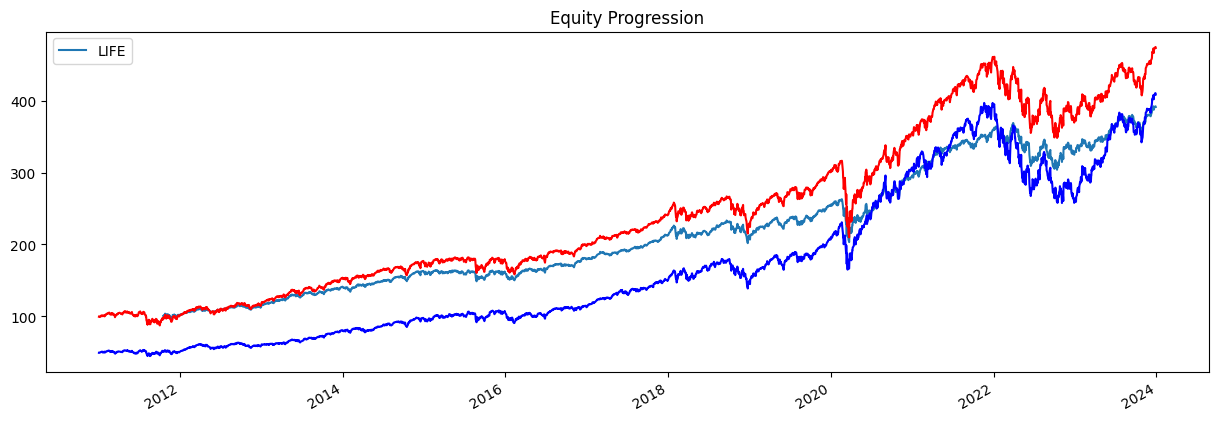

In [51]:
from matplotlib import pyplot as plt
result.plot()
plt.plot(SPY, color='red')
plt.plot(QQQ, color='blue')
plt.legend()